# Dynamic Thresh Algorithm V1

### Details:
>   - Use **ST Baseline** and **LT Sigma** as the basic **Parameters** 
>   - Calculate Fomula:

$$ baseline_{st} = \frac{1}{m}\sum_{i=0}^{m}data_{st}(i) $$
$$ \sigma_{lt} = \frac{1}{m}\sum_{i=0}^{m}(data_{lt}(i)-\mu_{lt}) $$

$$ upper\_thresh = baseline_{st} + k * \sigma_{lt} $$
$$ upper\_thresh = baseline_{st} - k * \sigma_{lt} $$
> $k$ is the **Hyperparameters** to be calculated by **Cross Validation**



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import smooth

# RPS

In [2]:
# load data
sigma_rps = np.load('data/sigma_rps.npy') # original sigma data
rps_data_t = pd.read_csv('data/rps_test_data.csv', index_col=0)
rps_data_t.index = pd.to_datetime(rps_data_t.index)

# base_data
ppd = 720
days_t_rps = rps_data_t.shape[0]/ppd
base_data_rps = rps_data_t.iloc[:5*ppd].values

# test_data
base_data_rps_dbd = base_data_rps.reshape((5, ppd))
test_data_rps = rps_data_t.iloc[5*ppd:].values

In [3]:
k=1
baseline_rps = base_data_rps_dbd.mean(axis=0)
upper_thresh_rps= baseline_rps + k * sigma_rps
lower_thresh_rps= baseline_rps - k * sigma_rps

In [4]:
idx_rps = np.where(np.any((test_data_rps > upper_thresh_rps.reshape(upper_thresh_rps.size, -1), test_data_rps< lower_thresh_rps.reshape(lower_thresh_rps.size, -1)), axis=0))
idx_rps[0].shape

(0,)

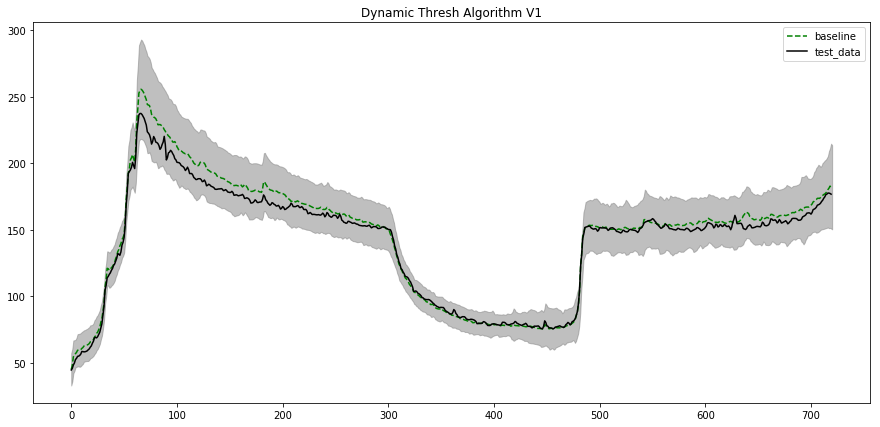

In [5]:
t = np.linspace(0, ppd, ppd)
plt.figure(figsize=(15, 7))
plt.plot(baseline_rps, 'g', label="baseline", ls='--')
# plt.plot(upper_thresh_rps, 'r', label='upper_thresh')
# plt.plot(lower_thresh_rps, 'r', label='lower_thresh')
plt.fill_between(t, lower_thresh_rps, upper_thresh_rps, color=(0.5, 0.5, 0.5, 0.5))
plt.plot(test_data_rps, 'k', label='test_data')
plt.plot(idx_rps[0], test_data_rps[idx_rps], 'ro')
plt.legend()
plt.title('Dynamic Thresh Algorithm V1')
# plt.savefig('Dynamic Thresh Algorithm V1.png', dpi=200)
plt.show()

# CPU

In [6]:
# load data
sigma_cpu = np.load('data/sigma_cpu.npy') # original sigma data
cpu_data_t = pd.read_csv('data/cpu_test_data.csv', index_col=0)
cpu_data_t.index = pd.to_datetime(cpu_data_t.index)

# base_data
ppd = 720
days_cpu_t = cpu_data_t.shape[0]/ppd
base_data_cpu = cpu_data_t.iloc[:5*ppd].values

# test_daaa
base_data_cpu_dbd = base_data_cpu.reshape((5, ppd))
test_data_cpu = cpu_data_t.iloc[5*ppd:].values


In [7]:
k=2
baseline_cpu = base_data_cpu_dbd[:3].mean(axis=0) # the 4th day has something wrong
upper_thresh_cpu = baseline_cpu + k * sigma_cpu
lower_thresh_cpu = baseline_cpu - k * sigma_cpu

In [8]:
test_data_cpu = base_data_cpu_dbd[3].reshape((ppd, -1))
test_data_cpu.shape

(720, 1)

In [9]:
idx_cpu = np.where(np.any((test_data_cpu > upper_thresh_cpu.reshape(upper_thresh_cpu.size, -1), test_data_cpu < lower_thresh_cpu.reshape(lower_thresh_cpu.size, -1)), axis=0))
idx_cpu[0].shape

(158,)

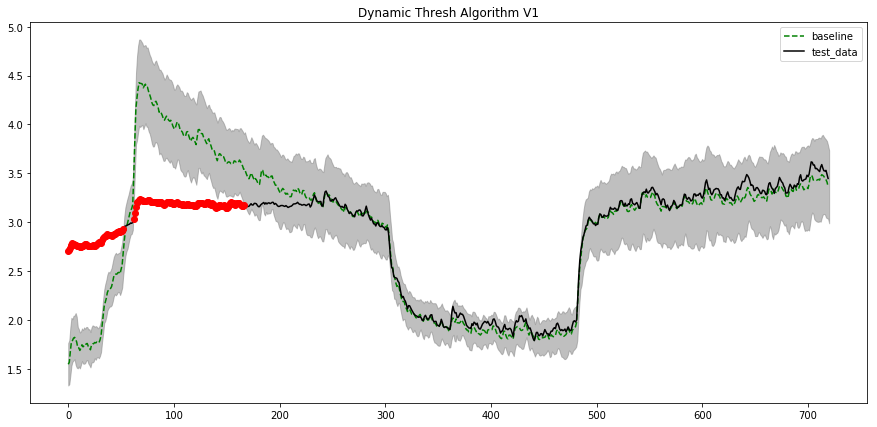

In [10]:
t = np.linspace(0, ppd, ppd)
plt.figure(figsize=(15, 7))
plt.plot(baseline_cpu, 'g', label="baseline", ls='--')
# plt.plot(upper_thresh_cpu, 'r', label='upper_thresh')
# plt.plot(lower_thresh_cpu, 'r', label='lower_thresh')
plt.fill_between(t, lower_thresh_cpu, upper_thresh_cpu, color=(0.5, 0.5, 0.5, 0.5))
plt.plot(test_data_cpu, 'k', label='test_data')
plt.plot(idx_cpu[0], test_data_cpu[idx_cpu], 'ro')
plt.legend()
plt.title('Dynamic Thresh Algorithm V1')
# plt.savefig('Dynamic Thresh Algorithm V1.png', dpi=200)
plt.show()